# Gathering Data


In [41]:
from pandas import read_csv
url = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'
data = read_csv(url)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
#pisahkah data fitur x dan label y dari dataset
X = data.values[: , :-1]
y = data.values[: , -1]

X = X.astype('float32')
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]], dtype=float32)

In [43]:
#encode label nilai kategorik menjadi nilai numerik, misal iris-setosa menjadi 1

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [44]:
#split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('Ukuran X train:', X_train.shape)
print('Ukuran y train:', y_train.shape)
print()
print('Ukuran X test:', X_test.shape)
print('Ukuran y test:', X_test.shape)

Ukuran X train: (120, 4)
Ukuran y train: (120,)

Ukuran X test: (30, 4)
Ukuran y test: (30, 4)


In [45]:
#define the model
""" mendefinisikan input layer bergantung pada dataset, 
    jadi arsitektur yang kita bangun harus memiliki:
        - input layer dengan 4 neuron
        - output layer dengan 3 neuron
"""

' mendefinisikan input layer bergantung pada dataset, \n    jadi arsitektur yang kita bangun harus memiliki:\n        - input layer dengan 4 neuron\n        - output layer dengan 3 neuron\n'

In [46]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense

In [47]:
#definiskan menggunakan sequential API 1

model = Sequential([
    Input(shape=(4,)),
    Dense(3, activation='relu'),
    Dense(3, activation='relu'),
    Dense(3, activation='softmax'),
], name='Sequential_API_1')

In [48]:
#definiskan menggunakan sequential API 1

model = Sequential(name='Sequential_API_2')
model.add(Input(shape=(4,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [49]:
#definisikan model menggunakan functional api

input_layer = Input(shape=(4,))
hid_layer_1 = Dense(3, activation='relu')(input_layer)
hid_layer_2 = Dense(3, activation='relu')(hid_layer_1)
output_layer = Dense(3, activation='softmax')(hid_layer_2)

In [50]:
#visualisasi model menggunakan model text description
model.summary()

Model: "Sequential_API_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 3)                 15        
                                                                 
 dense_22 (Dense)            (None, 3)                 12        
                                                                 
 dense_23 (Dense)            (None, 3)                 12        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
#visualisasi menggunakan architecture plot
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [52]:
#Compile the model

#pemilihan loss function, optimizer dan metrics
    # loss function, mendeteksi jauhnya hasil dan prediksi  
    # optimizer, mengubah nilai weight dan bias agar data hasil dan prediksi sesuai
    # metrics, mengukur hasil 

""" Loss Function | Implementasi
---|---
Mean Square Error (MSE) | Regression
Mean Absolute Error (MAE) | Regression
Binary Cross Entropy | Binary Classification
Categorical Cross Entropy | Multi-class Classification
Sparse Categorical Cross Entropy | Multi-class Classification

[TensorFlow-Keras Loss Function](https://www.tensorflow.org/api_docs/python/tf/keras/losses) """

""" Optimizer | Keterangan
---|---
SGD | Stochastic Gradient Descent
Momentum | SGD with Momentum
RMSprop | Root Mean Squared Propagation
AdaDelta | Adaptive Delta
AdaGrad | Adaptive Gradient Algorithm
Adam | Adaptive Moment Estimation


[TensorFlow Keras Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) """

""" Metrics |
--- |
Accuracy
Precission
Recall


[TensorFlow-Keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) """


' Metrics |\n--- |\nAccuracy\nPrecission\nRecall\n\n\n[TensorFlow-Keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) '

In [53]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [54]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = SparseCategoricalCrossentropy(),
    metrics = ['Accuracy']
)

In [55]:
#fit the model, kita lakukan training

hist = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_test,y_test),
    batch_size = 32,
    epochs = 200,
    verbose = 2
)

Epoch 1/200


4/4 - 1s - loss: 1.2458 - Accuracy: 0.3417 - val_loss: 1.1876 - val_Accuracy: 0.3000 - 632ms/epoch - 158ms/step
Epoch 2/200
4/4 - 0s - loss: 1.1962 - Accuracy: 0.3417 - val_loss: 1.1436 - val_Accuracy: 0.3000 - 25ms/epoch - 6ms/step
Epoch 3/200
4/4 - 0s - loss: 1.1512 - Accuracy: 0.3583 - val_loss: 1.1020 - val_Accuracy: 0.3000 - 25ms/epoch - 6ms/step
Epoch 4/200
4/4 - 0s - loss: 1.1081 - Accuracy: 0.3833 - val_loss: 1.0650 - val_Accuracy: 0.3333 - 24ms/epoch - 6ms/step
Epoch 5/200
4/4 - 0s - loss: 1.0739 - Accuracy: 0.3833 - val_loss: 1.0352 - val_Accuracy: 0.4000 - 24ms/epoch - 6ms/step
Epoch 6/200
4/4 - 0s - loss: 1.0414 - Accuracy: 0.4000 - val_loss: 1.0116 - val_Accuracy: 0.4333 - 22ms/epoch - 5ms/step
Epoch 7/200
4/4 - 0s - loss: 1.0173 - Accuracy: 0.4333 - val_loss: 0.9958 - val_Accuracy: 0.5667 - 22ms/epoch - 5ms/step
Epoch 8/200
4/4 - 0s - loss: 0.9981 - Accuracy: 0.4917 - val_loss: 0.9874 - val_Accuracy: 0.5667 - 23ms/epoch - 6ms/step
Epoch 9/200
4/4 - 0s - loss: 0.9849 - Acc

In [56]:
from matplotlib import pyplot

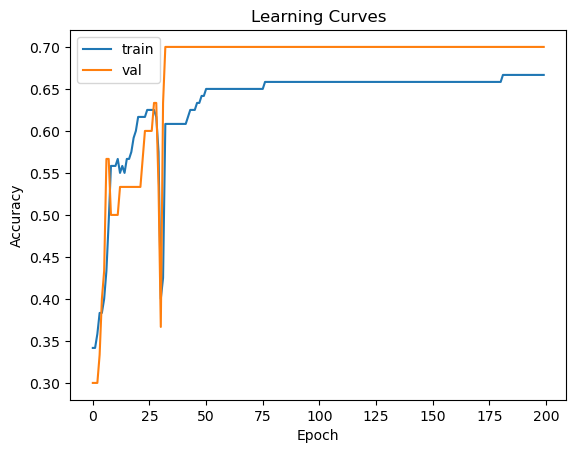

In [57]:
#plot accuracy learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(hist.history['Accuracy'], label='train')
pyplot.plot(hist.history['val_Accuracy'], label='val')
pyplot.legend()
pyplot.show()

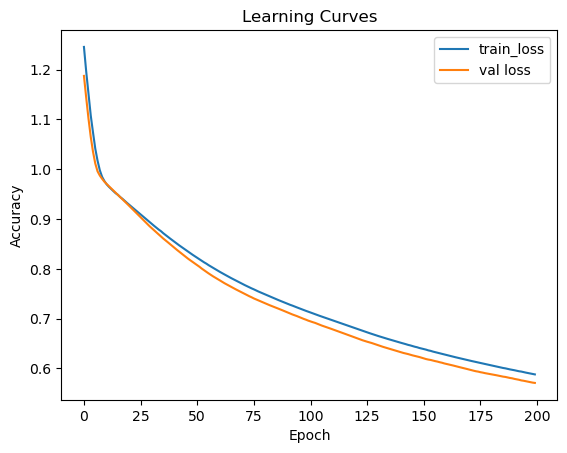

In [58]:
#plot loss learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(hist.history['loss'], label='train_loss')
pyplot.plot(hist.history['val_loss'], label='val loss')
pyplot.legend()
pyplot.show()

In [59]:
#D. evaluate the model

loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy:',{acc})

1/1 - 0s - loss: 0.5707 - Accuracy: 0.7000 - 19ms/epoch - 19ms/step
Test Accuracy: {0.699999988079071}


In [60]:
#E. make prediction
from numpy import argmax #mencari index elemen terbesar dalam list

#input data baru
new_sepal_length = float(input('Input Sepal Length :'))
new_sepal_width = float(input('Input Sepal Width :'))
new_petal_length = float(input('Input Petal Length :'))
new_petal_width = float(input('Input Petal Width :'))

new_data = [new_sepal_length, new_sepal_width, new_petal_length, new_petal_width]

#prediksi data baru lalu cari class nya
y_pred = model.predict([new_data])
y_class = argmax(y_pred)

#cetak hasil prediksi
print(f'\nHasil Prediksi :{y_pred} (class={y_class}) \n')

if y_class == 0:
    print('Iris Sentosa')
elif y_class == 1:
    print('Iris Versicolor')
if y_class == 2:
    print('Iris Virginica')

1/1 [==============================] - 0s 81ms/step

Hasil Prediksi :[[0.01598195 0.45130482 0.5327132 ]] (class=2) 

Iris Virginica
